# Diabetes 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [2]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
diabetes.head()  #必要的

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#768 rows × 9 columns 768个数据点，9个特征

In [8]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [ ]:
#“结果”是我们要预测的特征，0表示没有糖尿病，1表示糖尿病。在这768个数据点中，有500个被标记为0，而268被标记为1：

In [11]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


/Users/yys113/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

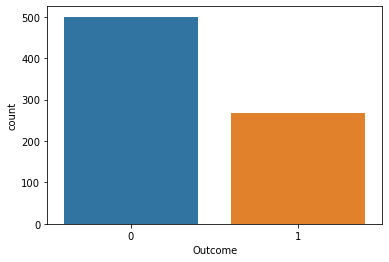

In [14]:
import seaborn as sns 
sns.countplot(diabetes['Outcome'],label = "Count")

In [21]:
print(diabetes.groupby('Pregnancies').size())  #怀孕
print('\n')
print(diabetes.groupby('Outcome').size())
print('\n')
print(diabetes.groupby('Glucose').size())  #糖尿病
print('\n')
print(diabetes.groupby('BloodPressure').size()) #血压
print('\n')
print(diabetes.groupby('SkinThickness').size())  #皮肤厚度
print('\n')
print(diabetes.groupby('Insulin').size())#胰岛素
print('\n')
print(diabetes.groupby('BMI').size())   #BMI指数
print('\n')
print(diabetes.groupby('DiabetesPedigreeFunction').size())  #糖尿病血统功能
print('\n')
print(diabetes.groupby('Age').size())


Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64


Outcome
0    500
1    268
dtype: int64


Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64


BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
dtype: int64


SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18  

In [22]:
diabetes.info()   #整个csv信息。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/Users/yys113/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

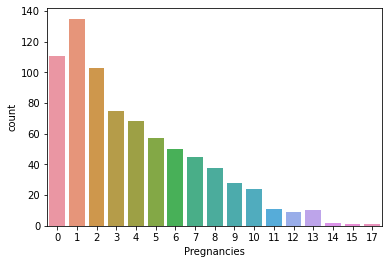

In [23]:
sns.countplot(diabetes['Pregnancies'],label = "Count")

In [43]:
#KNN来进行预测糖尿病diabetes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc\
                [:,diabetes.columns != 'Outcome'],diabetes['Outcome'],\
                stratify = diabetes['Outcome'], random_state = 66)

In [44]:
print(X_train)#576

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
612            7      168             88             42      321  38.2   
557            8      110             76              0        0  27.8   
26             7      147             76              0        0  39.4   
70             2      100             66             20       90  32.9   
73             4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
632            2      111             60              0        0  26.2   
56             7      187             68             39      304  37.7   
530            2      122             60             18      106  29.8   
568            4      154             72             29      126  31.3   
544            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
612                     0.787   40  
557                     0.237   58  


In [48]:
print(X_test) #192

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
506            0      180             90             26       90  36.5   
709            2       93             64             32      160  38.0   
257            2      114             68             22        0  28.7   
518           13       76             60              0        0  32.8   
432            1       80             74             11       60  30.0   
..           ...      ...            ...            ...      ...   ...   
143           10      108             66              0        0  32.4   
686            3      130             64              0        0  23.1   
681            0      162             76             36        0  49.6   
510           12       84             72             31        0  29.7   
426            0       94              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  
506                     0.314   35  
709                     0.674   23  


In [49]:
print(y_train)#Length: 576,

612    1
557    0
26     1
70     1
73     0
      ..
632    0
56     1
530    0
568    0
544    0
Name: Outcome, Length: 576, dtype: int64


In [50]:
print(y_test)# Length: 192,

506    1
709    1
257    0
518    0
432    0
      ..
143    1
686    0
681    1
510    1
426    0
Name: Outcome, Length: 192, dtype: int64


In [24]:
diabetes['Outcome']  #看一共多少数据

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
diabetes.columns != 'Outcome' #直接看真假。对错。 

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [28]:
stratify = diabetes['Outcome']
stratify#分层

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
random_state = 66
random_state

66

In [ ]:
#分

In [92]:
#KNN来进行预测糖尿病diabetes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc\
                [:,diabetes.columns != 'Outcome'],diabetes['Outcome'],\
                stratify = diabetes['Outcome'], random_state = 20)

In [93]:
diabetes.loc[:,diabetes.columns != 'Outcome']  #把前面非outcome的都取出来。

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [94]:
diabetes['Outcome']  #单独取出来outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [95]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = [] 
test_accuracy = []
#然后跑一波1-10的k

K = range(1,11)
#建立模型，在for内
for k in K:   
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    
    training_accuracy.append(knn.score(X_train, y_train))
    
    test_accuracy.append(knn.score(X_test, y_test))
    print(k)
    print(knn)
    print(training_accuracy)
    print(test_accuracy)

1
KNeighborsClassifier(n_neighbors=1)
[1.0]
[0.7239583333333334]
2
KNeighborsClassifier(n_neighbors=2)
[1.0, 0.8315972222222222]
[0.7239583333333334, 0.7447916666666666]
3
KNeighborsClassifier(n_neighbors=3)
[1.0, 0.8315972222222222, 0.8315972222222222]
[0.7239583333333334, 0.7447916666666666, 0.7135416666666666]
4
KNeighborsClassifier(n_neighbors=4)
[1.0, 0.8315972222222222, 0.8315972222222222, 0.7934027777777778]
[0.7239583333333334, 0.7447916666666666, 0.7135416666666666, 0.734375]
5
KNeighborsClassifier()
[1.0, 0.8315972222222222, 0.8315972222222222, 0.7934027777777778, 0.7847222222222222]
[0.7239583333333334, 0.7447916666666666, 0.7135416666666666, 0.734375, 0.7395833333333334]
6
KNeighborsClassifier(n_neighbors=6)
[1.0, 0.8315972222222222, 0.8315972222222222, 0.7934027777777778, 0.7847222222222222, 0.7777777777777778]
[0.7239583333333334, 0.7447916666666666, 0.7135416666666666, 0.734375, 0.7395833333333334, 0.7552083333333334]
7
KNeighborsClassifier(n_neighbors=7)
[1.0, 0.8315972

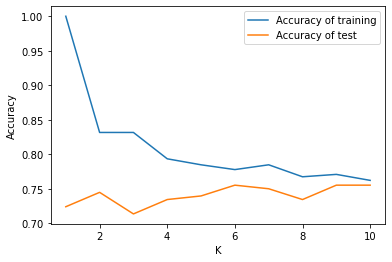

In [96]:
pl.plot(K,training_accuracy, label = "Accuracy of training")
pl.plot(K,test_accuracy, label = "Accuracy of test")
pl.xlabel("K");pl.ylabel("Accuracy")
pl.legend()
pl.show()

In [ ]:
#看分类的准确性。

In [97]:
Knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train) 
print('Accuracy of KNN classifier on train dataset: %.2f'%(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test dataset: %.2f'%(knn.score(X_test, y_test)))


Accuracy of KNN classifier on train dataset: 0.76
Accuracy of KNN classifier on test dataset: 0.76


In [ ]:
# 训练集上__的K-NN分类器的准确性_：0.76
# 训练集上的K-NN分类器的准确性：0.76